# CODSOFT - Data Science Internship
# Task:3: Classifying the Iris Flower #
## Name: Faizan Tanveer

#### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### 1. Reading Data

In [2]:
iris=pd.read_csv("IRIS.csv")

We can see following columns (i.e. features) of our dataset and their certain attributes below:

In [3]:
iris.head(10)

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa

In [4]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [5]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
iris.shape

(150, 5)

In [7]:
iris_copy=iris.copy()

In [8]:
iris_copy.head(2)

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa

### 2. Completeness

Checking for the missing values in our dataset.

In [9]:
iris_copy.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### 3. Feature Engineering

### Adding columns
Now, we will add few columns by converting the existing columns of continous numerical values into categorical class for better readiability and visualization.

#### a. Sepal_Length_Category

In [10]:
iris_copy['Sepal_Length_Category'] = ''
iris_copy.loc[(iris['sepal_length']<4) & (iris['sepal_length']>=0), 'Sepal_Length_Category'] = '0-4'
iris_copy.loc[(iris['sepal_length']<5) & (iris['sepal_length']>=4), 'Sepal_Length_Category'] = '4-5'
iris_copy.loc[(iris['sepal_length']<6) & (iris['sepal_length']>=5), 'Sepal_Length_Category'] = '5-6'
iris_copy.loc[(iris['sepal_length']<7) & (iris['sepal_length']>=6), 'Sepal_Length_Category'] = '6-7'
iris_copy.loc[(iris['sepal_length']<8) & (iris['sepal_length']>=7), 'Sepal_Length_Category'] = '7-8'

#### b. Sepal_Width_Category

In [11]:
iris_copy['Sepal_Width_Category'] = ''
iris_copy.loc[(iris['sepal_width']<2) & (iris['sepal_width']>=0), 'Sepal_Width_Category'] = '0-2'
iris_copy.loc[(iris['sepal_width']<3) & (iris['sepal_width']>=2), 'Sepal_Width_Category'] = '2-3'
iris_copy.loc[(iris['sepal_width']<4) & (iris['sepal_width']>=3), 'Sepal_Width_Category'] = '3-4'
iris_copy.loc[(iris['sepal_width']<6) & (iris['sepal_width']>=4), 'Sepal_Width_Category'] = '4-6'

#### c. Petal_Length_Category

In [12]:
iris_copy['Petal_Length_Category'] = ''
iris_copy.loc[(iris['petal_length']<2) & (iris['petal_length']>=0), 'Petal_Length_Category'] = '0-2'
iris_copy.loc[(iris['petal_length']<4) & (iris['petal_length']>=2), 'Petal_Length_Category'] = '2-4'
iris_copy.loc[(iris['petal_length']<6) & (iris['petal_length']>=4), 'Petal_Length_Category'] = '4-6'
iris_copy.loc[(iris['petal_length']<8) & (iris['petal_length']>=6), 'Petal_Length_Category'] = '6-8'

#### d. Petal_Width_Category

In [13]:
iris_copy['Petal_Width_Category'] = ''
iris_copy.loc[(iris['petal_width']<1) & (iris['petal_width']>=0), 'Petal_Width_Category'] = '0-1'
iris_copy.loc[(iris['petal_width']<2) & (iris['petal_width']>=1), 'Petal_Width_Category'] = '1-2'
iris_copy.loc[(iris['petal_width']<3) & (iris['petal_width']>=2), 'Petal_Width_Category'] = '2-3'
iris_copy.loc[(iris['petal_width']<4) & (iris['petal_width']>=3), 'Petal_Width_Category'] = '3-4'

In [14]:
iris_copy.head(2)

sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   

  Sepal_Length_Category Sepal_Width_Category Petal_Length_Category  \
0                   5-6                  3-4                   0-2   
1                   4-5                  3-4                   0-2   

  Petal_Width_Category  
0                  0-1  
1                  0-1

### 4. Exploration

Let's visualize the relationship between our explanatory variables (features) and response variable (target), in order to do feature engineering out of it.

In [15]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

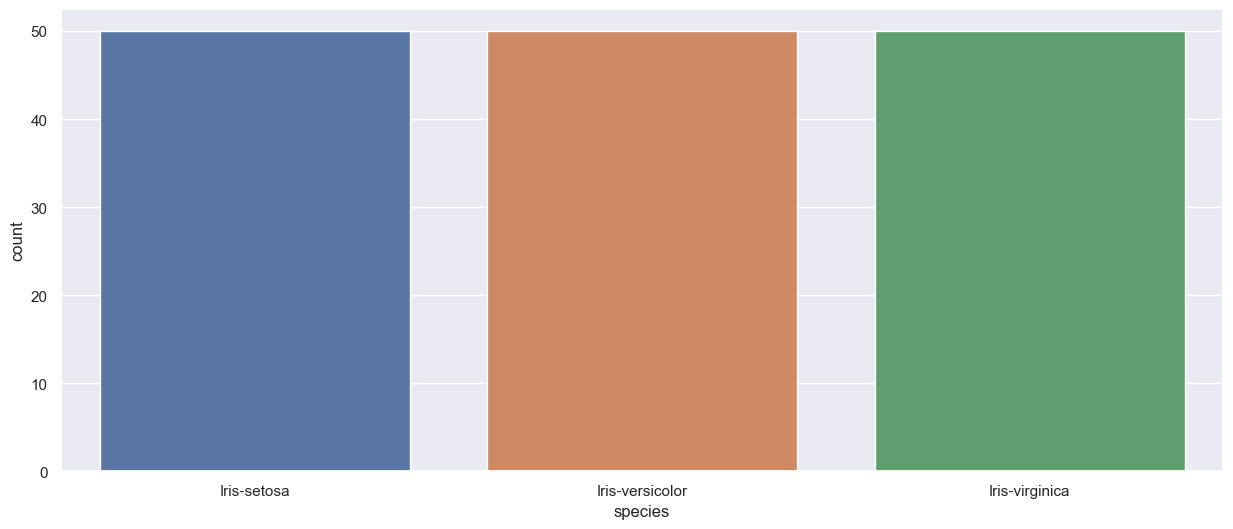

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(x='species', data=iris)

In [17]:
order_petal_length=['0-2','2-4','4-6','6-8']

<AxesSubplot:xlabel='Petal_Length_Category', ylabel='count'>

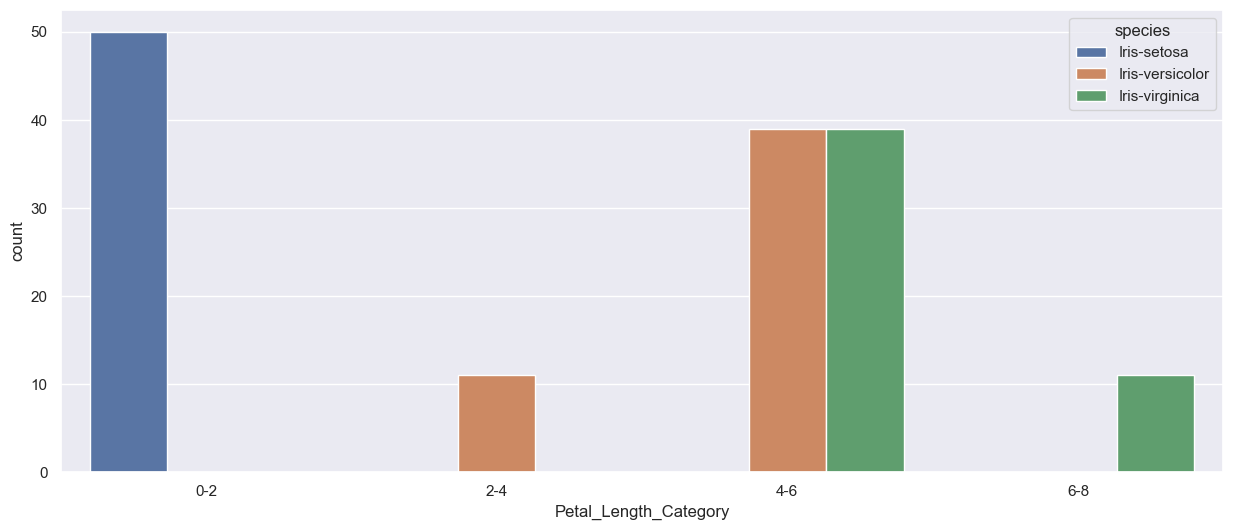

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x='Petal_Length_Category', hue='species', order=order_petal_length, data=iris_copy)

In [19]:
order_petal_width=['0-1','1-2','2-3']

<AxesSubplot:xlabel='Petal_Width_Category', ylabel='count'>

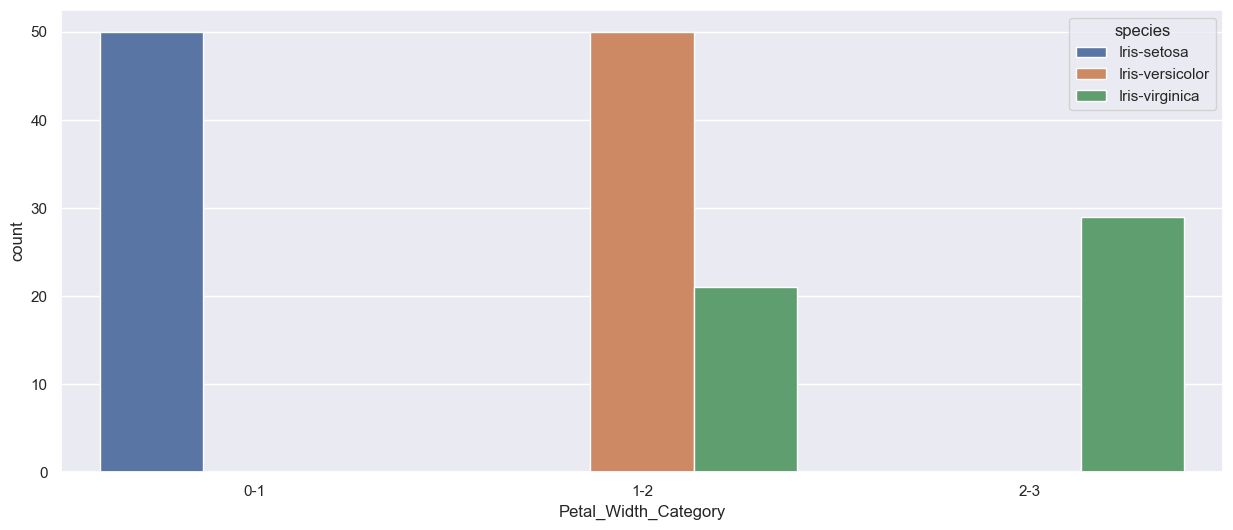

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(x='Petal_Width_Category', hue='species', order=order_petal_width, data=iris_copy)

In [21]:
order_sepal_length=['0-4','4-5','5-6', '6-7', '7-8']

<AxesSubplot:xlabel='Sepal_Length_Category', ylabel='count'>

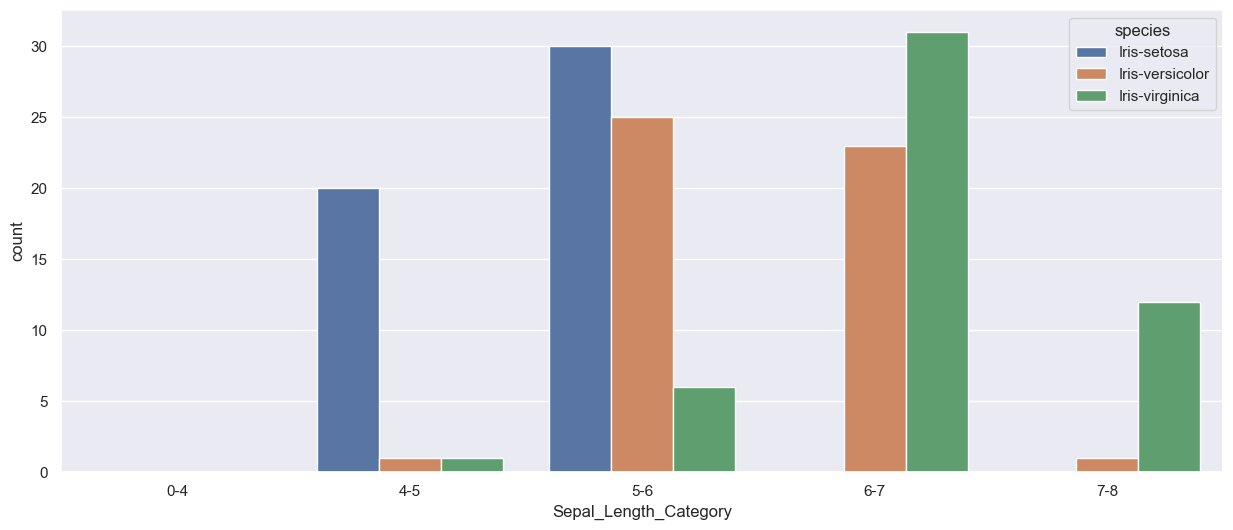

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(x='Sepal_Length_Category', hue='species', order=order_sepal_length, data=iris_copy)

In [23]:
order_sepal_width=['0-2','2-3', '3-4','4-6']

<AxesSubplot:xlabel='Sepal_Width_Category', ylabel='count'>

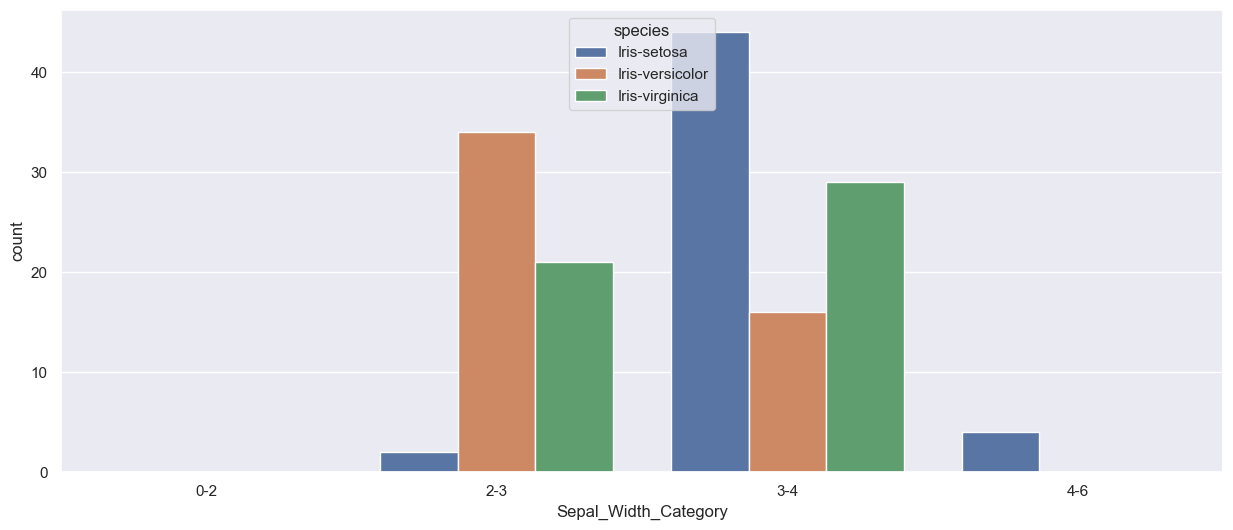

In [63]:
plt.figure(figsize=(15,6))
sns.countplot(x='Sepal_Width_Category', hue='species', order=order_sepal_width, data=iris_copy)

_We see a pattern that setosa, versicolor, and virginica has increasing petals and sepals size respectively. We also see the correlation between target and features using the heatmap._

In [64]:
iris_copy_2=iris.copy()

#### Label encoding 

In [65]:
from sklearn.preprocessing import LabelEncoder
lab_en = LabelEncoder()

In [67]:
iris_copy_2.loc[:,'species'] = lab_en.fit_transform(iris_copy_2.loc[:,'species'])

In [69]:
iris_copy_2.head(2)

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0

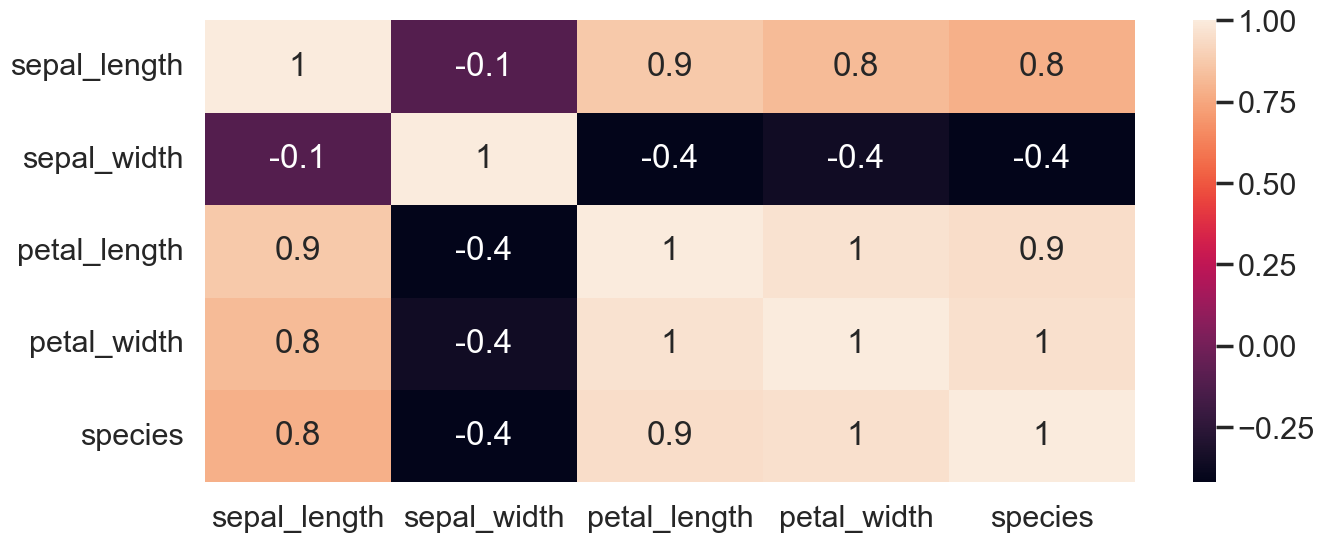

In [71]:
sns.set_context('poster')
plt.figure(figsize=(15,6))
cor = iris_copy_2.corr() 
sns.heatmap(cor, annot=True, fmt='.1g');

### 5. Applying machine learning model

#### Creating Independent and Dependent Variables

In [25]:
X = iris.drop(['species'], axis=1)
Y = iris[['species']]

In [26]:
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [27]:
Y

species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]

#### Train Test Splitting

In [28]:
# Import the library
from sklearn.model_selection import train_test_split

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(105, 4) (105, 1)
(45, 4) (45, 1)


In [30]:
xtrain.head()

sepal_length  sepal_width  petal_length  petal_width
10            5.4          3.7           1.5          0.2
33            5.5          4.2           1.4          0.2
78            6.0          2.9           4.5          1.5
27            5.2          3.5           1.5          0.2
121           5.6          2.8           4.9          2.0

In [31]:
ytrain.head()

species
10       Iris-setosa
33       Iris-setosa
78   Iris-versicolor
27       Iris-setosa
121   Iris-virginica

### Logistic Regression

Since the response variable is categorical data so we will apply the logisitic regression to classify the Flower type.

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression(random_state=25)

#### Model Training

In [34]:
model.fit(xtrain, ytrain)

D:\Others\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=25)

#### Making Prediction

In [35]:
pred = model.predict(xtest)

In [36]:
pred_prb = model.predict_proba(xtest)

In [37]:
pd.DataFrame(pred).head(5)

0
0      Iris-setosa
1  Iris-versicolor
2   Iris-virginica
3  Iris-versicolor
4   Iris-virginica

In [38]:
pd.DataFrame(pred_prb).head(5)

0         1             2
0  0.968533  0.031467  1.057087e-07
1  0.001349  0.560524  4.381269e-01
2  0.003913  0.425870  5.702169e-01
3  0.015378  0.747439  2.371827e-01
4  0.000031  0.044842  9.551274e-01

In [39]:
class_names=np.unique(ytest)

In [40]:
class_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [41]:
name_predictions={class_names[i]: pred_prb[:,i] for i in range(len(class_names))}

In [42]:
pd.DataFrame(name_predictions).head(5)

Iris-setosa  Iris-versicolor  Iris-virginica
0     0.968533         0.031467    1.057087e-07
1     0.001349         0.560524    4.381269e-01
2     0.003913         0.425870    5.702169e-01
3     0.015378         0.747439    2.371827e-01
4     0.000031         0.044842    9.551274e-01

In [43]:
ytest.head(5)

species
28       Iris-setosa
72   Iris-versicolor
70   Iris-versicolor
85   Iris-versicolor
128   Iris-virginica

In [44]:
x = xtest.copy()
x['pred_probability_Iris-setosa'] = name_predictions['Iris-setosa']
x['pred_probability_Iris-versicolor'] = name_predictions['Iris-versicolor']
x['pred_probability_Iris-virginica'] = name_predictions['Iris-virginica']
x['pred'] = pred
x['actual'] = ytest

In [45]:
x.head(5)

sepal_length  sepal_width  petal_length  petal_width  \
28            5.2          3.4           1.4          0.2   
72            6.3          2.5           4.9          1.5   
70            5.9          3.2           4.8          1.8   
85            6.0          3.4           4.5          1.6   
128           6.4          2.8           5.6          2.1   

     pred_probability_Iris-setosa  pred_probability_Iris-versicolor  \
28                       0.968533                          0.031467   
72                       0.001349                          0.560524   
70                       0.003913                          0.425870   
85                       0.015378                          0.747439   
128                      0.000031                          0.044842   

     pred_probability_Iris-virginica             pred           actual  
28                      1.057087e-07      Iris-setosa      Iris-setosa  
72                      4.381269e-01  Iris-versicolor  Iris-versicolor  
70                      5.702169e-01   Iris-virginica  Iris-versicolor  
85                      2.371827e-01  Iris-versicolor  Iris-versicolor  
128                     9.551274e-01   Iris-virginica   Iris-virginica

### 7. Model Evaluation

Applying multiple model evaluation criterias to test the prediction.

**Confusion Matrix Play ground**

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(ytest, pred)

array([[17,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 12]], dtype=int64)

In [48]:
s_s, s_vc, s_vg, vc_s, vc_vc, vc_vg, vg_s, vg_vc, vg_vg = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"pred_Setosa": [s_s, vc_s, vg_s], "pred_Versicolor": [
                           s_vc, vc_vc, vg_vc], "pred_Virginica": [s_vg, vc_vg, vg_vg]}, index=["Setosa", "Versicolor", "Virginica"])
conf_matrix

pred_Setosa  pred_Versicolor  pred_Virginica
Setosa               17                0               0
Versicolor            0               15               1
Virginica             0                0              12

**Accuracy**

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy = accuracy_score(ytest, pred)

In [51]:
accuracy

0.9777777777777777

**Precision**

In [52]:
from sklearn.metrics import precision_score

In [53]:
precision = precision_score(ytest, pred, average='macro')

In [54]:
precision

0.9743589743589745

**Recall**

In [55]:
from sklearn.metrics import recall_score

In [56]:
recall = recall_score(ytest, pred, average='macro')

In [57]:
recall

0.9791666666666666

**F1 Score**

In [58]:
from sklearn.metrics import f1_score

In [59]:
f1_score = f1_score(ytest, pred, average='macro')

In [60]:
f1_score

0.9759139784946237

**Classification Report**

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(ytest, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

